## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [27]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree
from sklearn.model_selection import train_test_split


from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

from sklearn.metrics import r2_score




### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [6]:
df = pd.read_csv('housing.csv',na_values=('NA','',' ','nan','NAN','na'))

In [7]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
df_dummies = pd.get_dummies(df,columns=object_columns,drop_first=True)

In [8]:
X = df_dummies.drop('median_house_value',axis=1)
y = df_dummies['median_house_value']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [10]:
reg_tree = DecisionTreeRegressor(max_depth=8,random_state = 42)
reg_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, random_state=42)

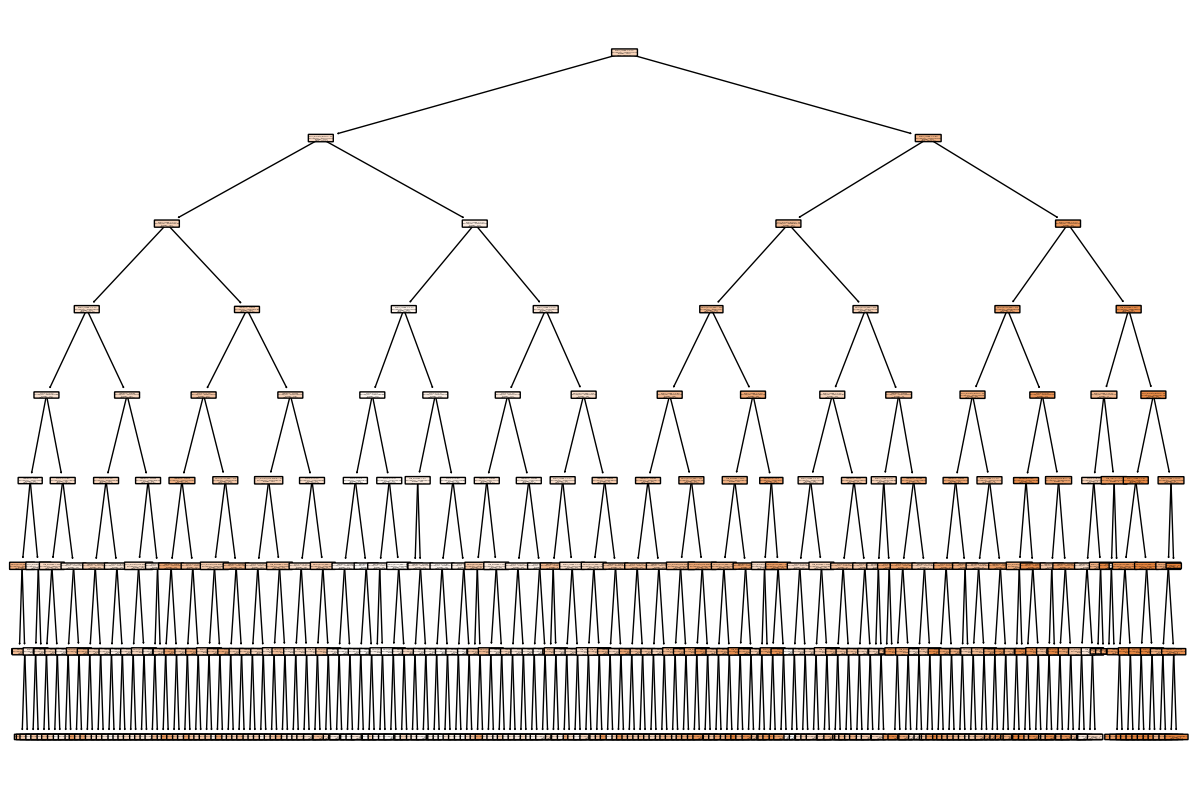

In [12]:
plt.figure(figsize=(15,10))
plot_tree(
    reg_tree,
    filled=True,
    rounded=True,
    class_names=["Low", "Medium", "High"],
    feature_names=X.columns);


In [15]:
y_train_pred = reg_tree.predict(X_train)
y_test_pred = reg_tree.predict(X_test)

mse_train = mean_absolute_error(y_train, y_train_pred)
mse_test = mean_absolute_error(y_test, y_test_pred)

print(f"Training Mean Absolute Error: {mse_train}")
print(f"Test Mean Absolute Error: {mse_test}")


Training Mean Absolute Error: 39641.91230722999
Test Mean Absolute Error: 43356.74498431826


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [16]:
path = reg_tree.cost_complexity_pruning_path(X_train, y_train)


In [17]:
ccp_alphas = path.ccp_alphas
impurities = path.impurities

In [18]:
print(f"CCP-alphas: {ccp_alphas}")


CCP-alphas: [0.00000000e+00 2.71317829e+02 1.52616279e+04 4.86659053e+04
 8.04000554e+04 9.39372231e+04 1.08527132e+05 1.22106001e+05
 1.26696198e+05 1.46307892e+05 1.48251510e+05 1.96153562e+05
 1.97403331e+05 2.25130237e+05 2.27291012e+05 2.32032807e+05
 2.64958818e+05 2.73223630e+05 3.92381436e+05 4.07884905e+05
 4.19504776e+05 4.59004764e+05 4.74184122e+05 4.82935662e+05
 4.84720029e+05 4.90318038e+05 5.00470430e+05 5.27804447e+05
 5.51429494e+05 5.53720930e+05 5.80871336e+05 5.90330014e+05
 6.30021741e+05 6.68822642e+05 6.85691332e+05 6.93887043e+05
 6.99694767e+05 7.27868814e+05 7.28416138e+05 7.85747411e+05
 8.19300145e+05 8.21891534e+05 8.53601940e+05 8.66084736e+05
 8.88018448e+05 8.89942389e+05 9.10109516e+05 9.43419404e+05
 1.05102731e+06 1.09849369e+06 1.12652559e+06 1.15743408e+06
 1.18967907e+06 1.21779764e+06 1.22922951e+06 1.25789613e+06
 1.26992631e+06 1.30746835e+06 1.37661269e+06 1.49254855e+06
 1.49472515e+06 1.51609048e+06 1.57719874e+06 1.58918029e+06
 1.65352542e

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [19]:
regressors = []

In [20]:
for ccp_alpha in ccp_alphas:
    regressor = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    regressor.fit(X_train, y_train)
    regressors.append(regressor)

print(f"Total trees: {len(regressors)}")

Total trees: 202


### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [23]:
train_mse = []
test_mse = []

# Calcular o MSE para cada árvore
for regressor in regressors:
    # MSE na base de treino
    y_train_pred = regressor.predict(X_train)
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    
    # MSE na base de teste
    y_test_pred = regressor.predict(X_test)
    test_mse.append(mean_squared_error(y_test, y_test_pred))

# Exibir os MSEs
for i, ccp_alpha in enumerate(ccp_alphas):
    print(f"Alpha: {ccp_alpha:.5f} - MSE Treino: {train_mse[i]:.5f}, MSE Teste: {test_mse[i]:.5f}")

Alpha: 0.00000 - MSE Treino: 0.00000, MSE Teste: 4777505737.99306
Alpha: 271.31783 - MSE Treino: 190689.87123, MSE Teste: 4776965308.27643
Alpha: 15261.62791 - MSE Treino: 20889968.64268, MSE Teste: 4769940000.90287
Alpha: 48665.90532 - MSE Treino: 74073753.70957, MSE Teste: 4726353221.27850
Alpha: 80400.05537 - MSE Treino: 118340597.60230, MSE Teste: 4683720767.94884
Alpha: 93937.22315 - MSE Treino: 139034703.34144, MSE Teste: 4667100292.29048
Alpha: 108527.13178 - MSE Treino: 161117243.64894, MSE Teste: 4642014911.55121
Alpha: 122106.00083 - MSE Treino: 180373271.10990, MSE Teste: 4623013599.82229
Alpha: 126696.19786 - MSE Treino: 187108334.50974, MSE Teste: 4624923387.66066
Alpha: 146307.89164 - MSE Treino: 215888910.95200, MSE Teste: 4604921136.41753
Alpha: 148251.51012 - MSE Treino: 218243581.14627, MSE Teste: 4604925049.83095
Alpha: 196153.56220 - MSE Treino: 282656314.48472, MSE Teste: 4562215729.53321
Alpha: 197403.33149 - MSE Treino: 285018159.40898, MSE Teste: 4564385160.8758

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

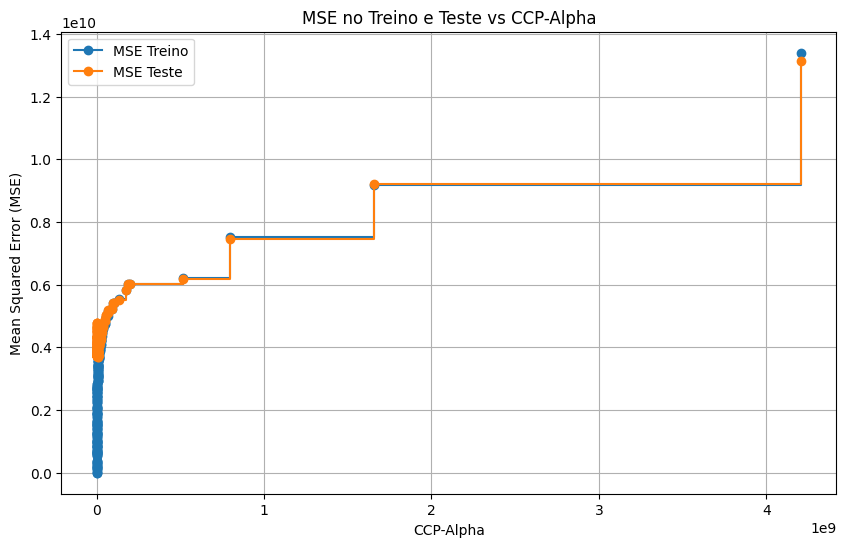

Melhor valor de alpha: 6538383.07348, com MSE Teste: 3697339501.66023


In [26]:

# Visualizar o MSE em função do CCP-alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_mse, marker='o', label='MSE Treino', drawstyle="steps-post")
plt.plot(ccp_alphas, test_mse, marker='o', label='MSE Teste', drawstyle="steps-post")
plt.xlabel('CCP-Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE no Treino e Teste vs CCP-Alpha')
plt.legend()
plt.grid(True)
plt.show()

# Encontrar o alpha com o menor MSE na base de teste
min_mse_alpha_index = np.argmin(test_mse)
best_alpha = ccp_alphas[min_mse_alpha_index]
best_mse = test_mse[min_mse_alpha_index]

print(f"Melhor valor de alpha: {best_alpha:.5f}, com MSE Teste: {best_mse:.5f}")

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [29]:
# Treinar a árvore de regressão com o melhor alpha encontrado
best_tree = DecisionTreeRegressor(ccp_alpha=best_alpha, random_state=42)
best_tree.fit(X_train, y_train)

# Fazer predições na base de teste
y_pred_test = best_tree.predict(X_test)

# Calcular o R-quadrado na base de teste
r2_test = r2_score(y_test, y_pred_test)

print(f"R-quadrado na base de teste para a árvore com CCP-Alpha {best_alpha:.5f}: {r2_test:.5f}")

R-quadrado na base de teste para a árvore com CCP-Alpha 6538383.07348: 0.71520


### 7. Visualize esta árvore.

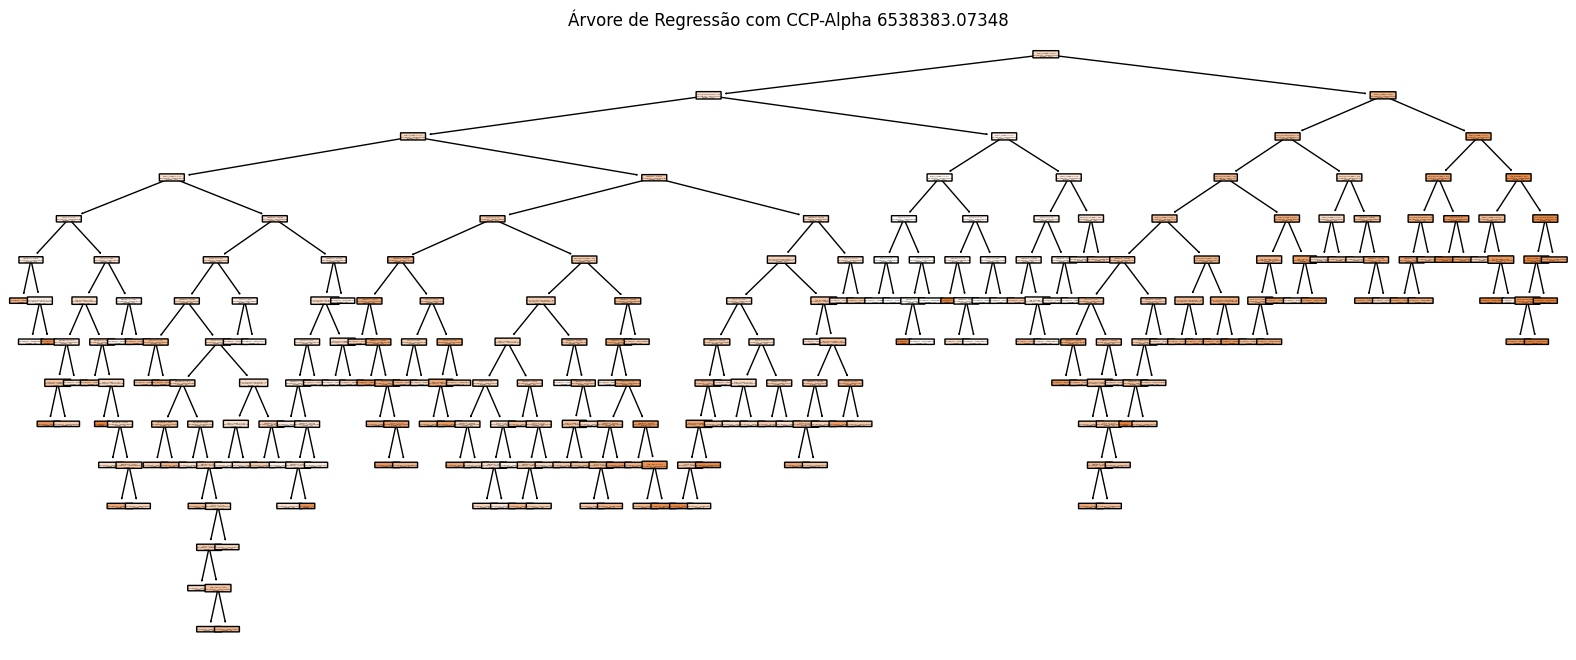

In [34]:
# Visualizar a árvore de regressão com o melhor alpha
plt.figure(figsize=(20,8))  # Definir o tamanho da figura
plot_tree(best_tree, 
          filled=True,            # Preencher os nós com cores baseadas no valor de saída
          feature_names=X_train.columns,  # Nomes das variáveis
          rounded=True)            # Nós com bordas arredondadas
plt.title(f"Árvore de Regressão com CCP-Alpha {best_alpha:.5f}")
plt.show()